# Deepmind bsuite

https://github.com/deepmind/bsuite 
"bsuite is a collection of carefully-designed experiments that investigate core capabilities of a reinforcement learning (RL) agent."

## Create a new conda environment
```bash
conda create --name bsuite python=3.6
conda activate bsuite
```

Reference: [conda cheat sheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)

## Install bsuite
You can install bsuite from it's official repository but for this tutorial you'll need some additional code I added to a forked version.

Run on terminal:
```bash
pip install "trfl[tensorflow]"
git clone git@github.com:thibaultallart/bsuite.git
export bsuite_path=`pwd`/bsuite 
pip install -e "bsuite[baselines]"
pip install jupyter
python -m ipykernel install --user --name bsuite --display-name "bsuite"
```

### Run bsuite experiments:
#### Random agent on Bernoulli bandit environment.
```bash
python $bsuite_path/bsuite/baselines/random/run.py --bsuite_id=BANDIT_BERNOULLI --save_path=/tmp/bsuite/bandit_bernoulli/random --overwrite=True
``` 

#### Thompson sampling agent on Bernoulli bandit environment.
```bash
python $bsuite_path/bsuite/baselines/thompson_sampling/run.py --bsuite_id=BANDIT_BERNOULLI --save_path=/tmp/bsuite/bandit_bernoulli/ts --overwrite=True
```

#### Default DQN agent on Bernoulli bandit environment.
Note that DQN will run with default parameters here and they may not be well suited for this task.
```bash
python $bsuite_path/bsuite/baselines/dqn/run.py --bsuite_id=BANDIT_BERNOULLI --save_path=/tmp/bsuite/bandit_bernoulli/dqn --overwrite=True
```

In [1]:
#@title Imports

# pylint: disable=unused-import

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import warnings
import numpy as np
import pandas as pd
import plotnine as gg

# You can implement your own logging system, and use this to read results.
# bsuite import section.
# begin bsuite imports.
from bsuite.logging import csv_load
from bsuite.logging import sqlite_load
from bsuite.experiments import summary_analysis
# end bsuite imports.

pd.options.mode.chained_assignment = None
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(12, 8), panel_spacing_x=0.5, panel_spacing_y=0.5)
warnings.filterwarnings('ignore')

In [2]:
experiments = {'Thompson sampling':'/tmp/bsuite/bandit_bernoulli/ts',
               'Random':'/tmp/bsuite/bandit_bernoulli/random',
               'dqn':'/tmp/bsuite/bandit_bernoulli/dqn',
               }  
DF, SWEEP_VARS = csv_load.load_bsuite(experiments)

In [3]:
DF

,steps,episode,total_return,episode_len,episode_return,total_regret,bsuite_id,results_dir,bsuite_env,seed,noise_scale,reward_scale,height_threshold,x_reward_threshold,size,memory_length,num_bits,n_distractor,chain_length,agent_name
0,1,1,0.0,1,0.0,1.0,bandit_bernoulli/2,/tmp/bsuite/bandit_bernoulli/ts,bandit_bernoulli,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thompson sampling
1,2,2,1.0,1,1.0,1.2,bandit_bernoulli/2,/tmp/bsuite/bandit_bernoulli/ts,bandit_bernoulli,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thompson sampling
2,3,3,2.0,1,1.0,1.4,bandit_bernoulli/2,/tmp/bsuite/bandit_bernoulli/ts,bandit_bernoulli,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thompson sampling
3,4,4,3.0,1,1.0,1.4,bandit_bernoulli/2,/tmp/bsuite/bandit_bernoulli/ts,bandit_bernoulli,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thompson sampling
4,5,5,4.0,1,1.0,1.6,bandit_bernoulli/2,/tmp/bsuite/bandit_bernoulli/ts,bandit_bernoulli,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thompson sampling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,6000,6000,5744.0,1,1.0,260.8,bandit_bernoulli/0,/tmp/bsuite/bandit_bernoulli/dqn,bandit_bernoulli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dqn
192,7000,7000,6724.0,1,1.0,279.5,bandit_bernoulli/0,/tmp/bsuite/bandit_bernoulli/dqn,bandit_bernoulli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dqn
193,8000,8000,7699.0,1,1.0,309.0,bandit_bernoulli/0,/tmp/bsuite/bandit_bernoulli/dqn,bandit_bernoulli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dqn
194,9000,9000,8673.0,1,1.0,340.2,bandit_bernoulli/0,/tmp/bsuite/bandit_bernoulli/dqn,bandit_bernoulli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dqn


In [4]:
from bsuite.experiments.bandit import analysis as bandit_analysis


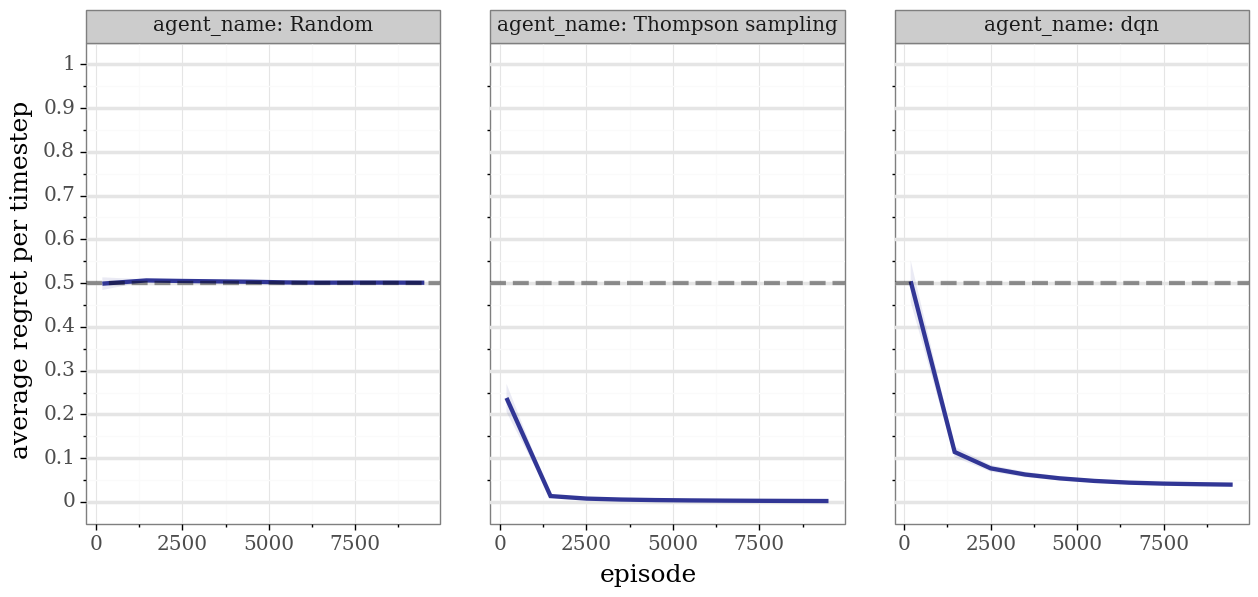

<ggplot: (305411136)>

In [5]:
bandit_analysis.plot_learning(DF, SWEEP_VARS)